# Simple Plot

[Matplotlib Tutorial#Simple Plot](http://www.labri.fr/perso/nrougier/teaching/matplotlib/#id5)

This first example provides a quick introduction to Vega. We will draw two curves on one plot, the _sine_ and _cosine_ functions from $-\pi$ to $+\pi$, and look at how to tweak and spruce up the results.


In [1]:
# Imports
import numpy as np
import pandas as pd
import altair as alt
import altair.vega.v3 as vega

# For inspecting Altair/Vega structures
import json

import copy

### Create Data

We need some data to display. Altair works best with long-form ([_tidy_](http://vita.had.co.nz/papers/tidy-data.pdf)) data, so we will structure our data frame this way.

In [2]:
x = np.linspace(-np.pi, np.pi, 256,endpoint=True)
c,s = np.cos(x), np.sin(x)
# Altair works best with long-form ("tidy") data.
df = pd.DataFrame({'x':x, 'cosine':c, 'sine':s}).melt('x')
df.columns = ['x', 'series', 'value']
df.head()

x  series     value
0 -3.141593  cosine -1.000000
1 -3.116953  cosine -0.999696
2 -3.092313  cosine -0.998786
3 -3.067673  cosine -0.997269
4 -3.043033  cosine -0.995147

### Plot using defaults

In Vega, the styling defaults have been selected with aesthetics in mind and you will already get nice results without modifying the default values.

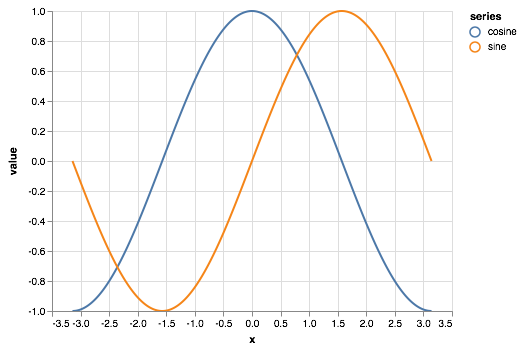

In [3]:
chart = alt.Chart(df).mark_line().encode(x='x', y='value', color='series')
chart

#### Aside: inspecting the Vega-lite specification

Altair is a package for working with Vega and Vega-lite within python / pandas. It outputs Vega and Vega-lite specifications for visualizations. 

In [4]:
# Inspect the vega-lite chart
chart_json = chart.to_dict()
del chart_json['data']
print(json.dumps(chart_json, sort_keys=True,indent=4, separators=(',', ': ')))

{
    "$schema": "https://vega.github.io/schema/vega-lite/v2.4.1.json",
    "config": {
        "view": {
            "height": 300,
            "width": 400
        }
    },
    "encoding": {
        "color": {
            "field": "series",
            "type": "nominal"
        },
        "x": {
            "field": "x",
            "type": "quantitative"
        },
        "y": {
            "field": "value",
            "type": "quantitative"
        }
    },
    "mark": "line"
}


### Explicitly set important configuration and styling preferences to match default values

This is the same chart as before, but here we explicitly set certain values to their defaults so you can manipulate them to see the effect on the output.

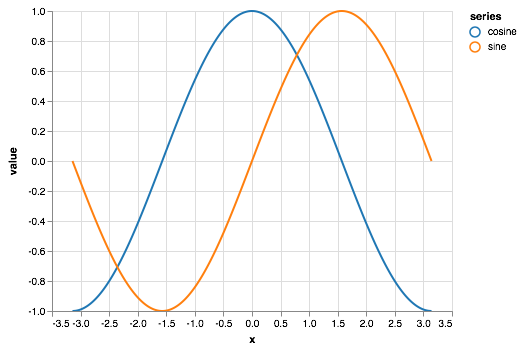

In [5]:
chart = alt.Chart(df,
                  # Set figure size
                  width=400, height=300
        ).mark_line(
        ).encode(
            # Set x limits
            alt.X('x', scale=alt.Scale(domain=(-3.5, 3.5))),
            # Set y limits
            alt.Y('value', scale=alt.Scale(domain=(-1.0, 1.0))),
            # Set the line color scheme
            alt.Color('series', scale=alt.Scale(scheme='category10')),  # see https://vega.github.io/vega/docs/schemes/#reference
            # Set the line stroke width
            alt.SizeValue(2)
        )
chart

### Changing colors and line widths

Let us do the same plot with a different color scheme, thicker lines, show the result with a different aspect ratio.

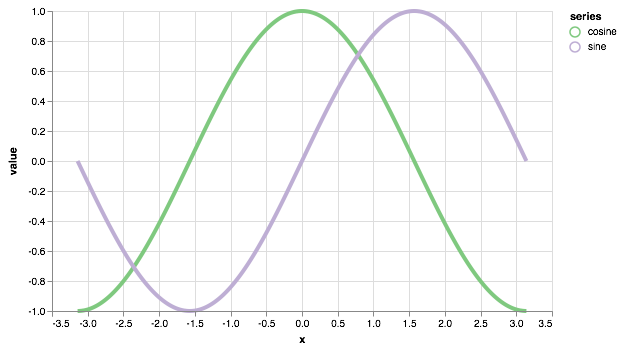

In [6]:
chart = alt.Chart(df, width=500, height=300)\
        .mark_line()\
        .encode(
            alt.Color('series', scale=alt.Scale(scheme='accent')),
            alt.SizeValue(4),
            x='x', y='value',
        )
chart

### Setting limits

Let us expand the limits a bit to give the curves some more breathing room.

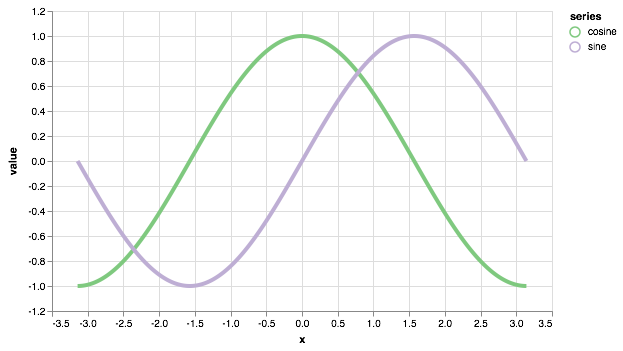

In [7]:
chart = alt.Chart(df, width=500, height=300)\
        .mark_line()\
        .encode(
            alt.X('x', scale=alt.Scale(domain=tuple(df.x.agg([np.min, np.max]) * 1.1))),
            alt.Y('value', scale=alt.Scale(domain=tuple(df.value.agg([np.min, np.max]) * 1.1))),
            alt.Color('series', scale=alt.Scale(scheme='accent')),
            alt.SizeValue(4), 
        )
chart

### Setting tick labels

Let us change the x-tick labels to show values that are convenient quantities in radians.  It would be nice to set the labels to $-\pi$, $-\pi/2$, etc. but this is not possible in Altair/Vega-Lite. We need to use the full Vega to do this. See below.

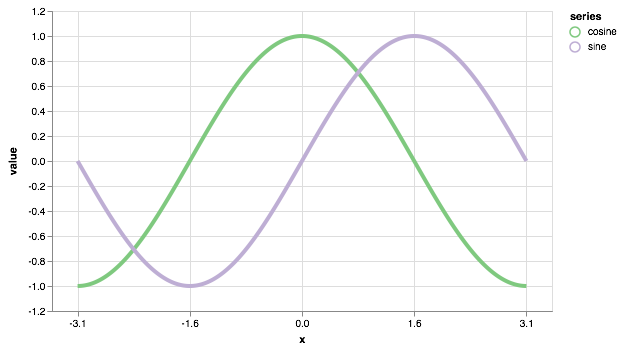

In [8]:
# See below on how to set labels to -pi, etc
chart = alt.Chart(df, width=500, height=300)\
        .mark_line()\
        .encode(
            alt.X('x',
                  axis=alt.Axis(values=[np.pi * 0.5 * t for t in range(-2, 3)]),
                  scale=alt.Scale(domain=tuple(df.x.agg([np.min, np.max]) * 1.1))),
            alt.Y('value', scale=alt.Scale(domain=tuple(df.value.agg([np.min, np.max]) * 1.1))),
            alt.Color('series', scale=alt.Scale(scheme='accent')),
            alt.SizeValue(4), 
        )
chart

### Change the legend symbol

The default legend symbol is the circle. This can be changed by specifying a different mark, either one of the available (```cross```, ```diamond```, ```square```, ```triangle-up```, or ```triangle-down```), or by specifying an SVG path, such as ```h0,2```.

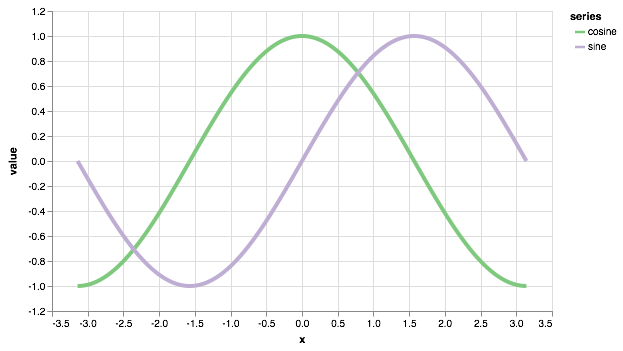

In [9]:
chart = alt.Chart(df, width=500, height=300, 
                  config=alt.Config(legend=alt.LegendConfig(symbolType="h0,2", symbolStrokeWidth=2.5)))\
        .mark_line()\
        .encode(
            alt.X('x', scale=alt.Scale(domain=tuple(df.x.agg([np.min, np.max]) * 1.1))),
            alt.Y('value', scale=alt.Scale(domain=tuple(df.value.agg([np.min, np.max]) * 1.1))),
            alt.Color('series', scale=alt.Scale(scheme='accent')),
            alt.SizeValue(4)
        )
chart

### Annotate some points

To tell a story with data, it is often useful to emphasize some data points, and annotation is an indispensable tool.

In [10]:
# Put the anntotations into a frame
x = [np.pi * 2 / 3]
c,s = np.cos(x), np.sin(x)
annot_text = ["cos(2π/3) = {:.2f}".format(c[0]), "sin(2π/3) = {:.2f}".format(s[0])]
annot_df = pd.DataFrame({'x':x, 'cosine':c, 'sine':s}).melt('x')
annot_df.columns = ['x', 'series', 'value']
annot_df['annot_text'] = annot_text
annot_df

x  series     value         annot_text
0  2.094395  cosine -0.500000  cos(2π/3) = -0.50
1  2.094395    sine  0.866025   sin(2π/3) = 0.87

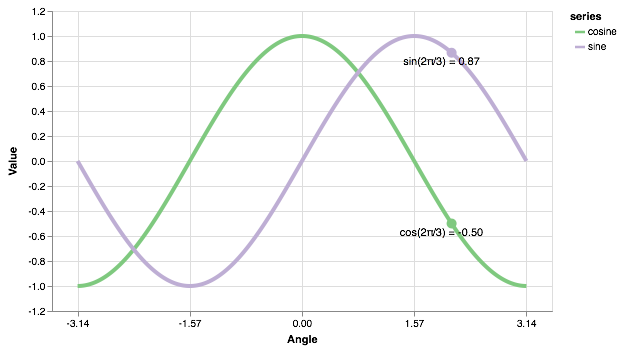

In [11]:
# Draw the main chart
chart = alt.Chart(df, width=500, height=300
        ).mark_line()\
        .encode(
            alt.X('x',
                  axis=alt.Axis(
                      values=[np.pi * 0.5 * t for t in range(-2, 3)],
                      format=".2f",
                      title="Angle"),
                  scale=alt.Scale(domain=tuple(df.x.agg([np.min, np.max]) * 1.1))),
            alt.Y('value', 
                  scale=alt.Scale(domain=tuple(df.value.agg([np.min, np.max]) * 1.1)),
                  axis=alt.Axis(title="Value")
            ),
            alt.Color('series', scale=alt.Scale(scheme='accent')),
            alt.SizeValue(4), 
        )
# Create a chart with annotations
annot_base = alt.Chart().encode(
    alt.X('x'),
    alt.Y('value'),
    alt.Text('annot_text', type='ordinal', format=".2f")
)
# Composite the two charts
annot = alt.layer(
    annot_base.mark_point(filled=True, size=100, opacity=1).encode(color='series'),
    annot_base.mark_text(dx=-10, dy=12),
    data=annot_df
)
alt.layer(chart, annot, 
          config=alt.Config(legend=alt.LegendConfig(symbolType="h0,2", symbolStrokeWidth=2.5)))

### Setting tick labels, Pt. 2

Let us change the x-tick labels to show values that are convenient quantities in radians with nice labels. It is not possible to do this in Altair/Vega-Lite, but we can do this in full Vega 3.

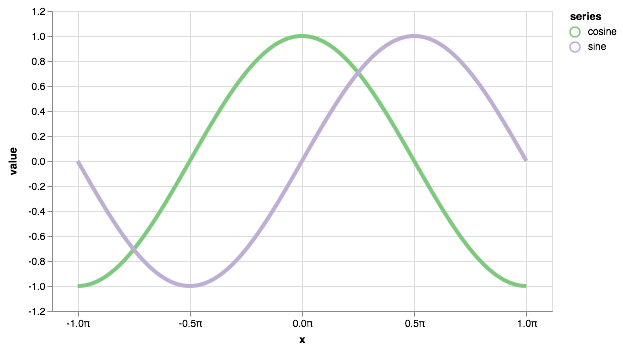

In [12]:
# This is the more basic chart
spec = {
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "autosize": "pad",
  "padding": 5,
  "width": 500,
  "height": 300,
  "style": "cell",
  "data": [
    {
      "name": "source_0",
      "values": df.apply(lambda x: x.to_dict(), 1).tolist()
    },
    {
      "name": "data_0",
      "source": "source_0",
      "transform": [
        {"type": "formula", "expr": "toNumber(datum[\"x\"])", "as": "x"},
        {"type": "formula", "expr": "toNumber(datum[\"value\"])", "as": "value"}
      ]
    }
  ],
  "marks": [
    {
      "name": "pathgroup",
      "type": "group",
      "from": {
        "facet": {
          "name": "faceted_path_main",
          "data": "data_0",
          "groupby": ["series"]
        }
      },
      "encode": {
        "update": {
          "width": {"field": {"group": "width"}},
          "height": {"field": {"group": "height"}}
        }
      },
      "marks": [
        {
          "name": "marks",
          "type": "line",
          "style": ["line"],
          "sort": {"field": "datum[\"x\"]", "order": "descending"},
          "from": {"data": "faceted_path_main"},
          "encode": {
            "update": {
              "stroke": {"scale": "color", "field": "series"},
              "x": {"scale": "x", "field": "x"},
              "y": {"scale": "y", "field": "value"},
              "strokeWidth": {"value": 4},
              "defined": {
                "signal": "datum[\"x\"] !== null && !isNaN(datum[\"x\"]) && datum[\"value\"] !== null && !isNaN(datum[\"value\"])"
              }
            }
          }
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "linear",
      "domain": [-3.455751918948773, 3.455751918948773],
      "range": [0, {"signal": "width"}],
      "nice": True,
      "zero": False
    },
    {
      "name": "y",
      "type": "linear",
      "domain": [-1.1, 1.0999791300835997],
      "range": [{"signal": "height"}, 0],
      "nice": True,
      "zero": False
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "data_0", "field": "series", "sort": True},
      "range": {"scheme": "accent"}
    }
  ],
  "axes": [
    {
      "scale": "x",
      "orient": "bottom",
      "title": "x",
      "values": [
        -3.141592653589793,
        -1.5707963267948966,
        0,
        1.5707963267948966,
        3.141592653589793
      ],
      "labelFlush": True,
      "labelOverlap": True,
      "tickCount": {"signal": "ceil(width/40)"},
      "encode": {
        "labels": {
          "update": {
            "text": {"signal": "format(datum.value/PI, '.1f') + 'π'"}
          }
        }
      },
      "zindex": 1
    },
    {
      "scale": "x",
      "orient": "bottom",
      "values": [
        -3.141592653589793,
        -1.5707963267948966,
        0,
        1.5707963267948966,
        3.141592653589793
      ],
      "grid": True,
      "tickCount": {"signal": "ceil(width/40)"},
      "gridScale": "y",
      "domain": False,
      "labels": False,
      "maxExtent": 0,
      "minExtent": 0,
      "ticks": False,
      "zindex": 0
    },
    {
      "scale": "y",
      "orient": "left",
      "title": "value",
      "labelOverlap": True,
      "tickCount": {"signal": "ceil(height/40)"},
      "zindex": 1
    },
    {
      "scale": "y",
      "orient": "left",
      "grid": True,
      "tickCount": {"signal": "ceil(height/40)"},
      "gridScale": "x",
      "domain": False,
      "labels": False,
      "maxExtent": 0,
      "minExtent": 0,
      "ticks": False,
      "zindex": 0
    }
  ],
  "legends": [{"stroke": "color", "title": "series"}],
  "config": {"axisY": {"minExtent": 30}}
}
vega.vega(spec)

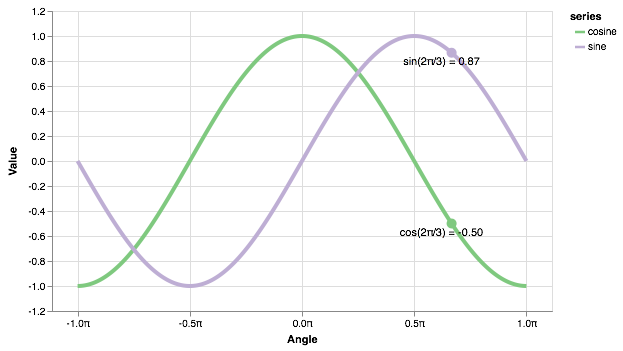

In [13]:
# Here is the final chart with nice labels
spec = {
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "autosize": "pad",
  "padding": 5,
  "width": 500,
  "height": 300,
  "style": "cell",
  "data": [
    {
      "name": "source_0",
      "values": [
        {
          "annot_text": "cos(2π/3) = -0.50",
          "series": "cosine",
          "value": -0.4999999999999998,
          "x": 2.0943951023931953
        },
        {
          "annot_text": "sin(2π/3) = 0.87",
          "series": "sine",
          "value": 0.8660254037844388,
          "x": 2.0943951023931953
        }
      ]
    },
    {
      "name": "source_1",
      "values": df.apply(lambda x: x.to_dict(), 1).tolist()
    },
    {
      "name": "data_1",
      "source": "source_0",
      "transform": [
        {"type": "formula", "expr": "toNumber(datum[\"x\"])", "as": "x"},
        {
          "type": "formula",
          "expr": "toNumber(datum[\"value\"])",
          "as": "value"
        },
        {
          "type": "filter",
          "expr": "datum[\"x\"] !== null && !isNaN(datum[\"x\"]) && datum[\"value\"] !== null && !isNaN(datum[\"value\"])"
        }
      ]
    },
    {
      "name": "data_2",
      "source": "source_0",
      "transform": [
        {"type": "formula", "expr": "toNumber(datum[\"x\"])", "as": "x"},
        {
          "type": "formula",
          "expr": "toNumber(datum[\"value\"])",
          "as": "value"
        },
        {
          "type": "filter",
          "expr": "datum[\"x\"] !== null && !isNaN(datum[\"x\"]) && datum[\"value\"] !== null && !isNaN(datum[\"value\"])"
        }
      ]
    },
    {
      "name": "data_3",
      "source": "source_1",
      "transform": [
        {"type": "formula", "expr": "toNumber(datum[\"x\"])", "as": "x"},
        {"type": "formula", "expr": "toNumber(datum[\"value\"])", "as": "value"}
      ]
    }
  ],
  "marks": [
    {
      "name": "layer_0_pathgroup",
      "type": "group",
      "from": {
        "facet": {
          "name": "faceted_path_layer_0_main",
          "data": "data_3",
          "groupby": ["series"]
        }
      },
      "encode": {
        "update": {
          "width": {"field": {"group": "width"}},
          "height": {"field": {"group": "height"}}
        }
      },
      "marks": [
        {
          "name": "layer_0_marks",
          "type": "line",
          "style": ["line"],
          "sort": {"field": "datum[\"x\"]", "order": "descending"},
          "from": {"data": "faceted_path_layer_0_main"},
          "encode": {
            "update": {
              "stroke": {"scale": "color", "field": "series"},
              "x": {"scale": "x", "field": "x"},
              "y": {"scale": "y", "field": "value"},
              "strokeWidth": {"value": 4},
              "defined": {
                "signal": "datum[\"x\"] !== null && !isNaN(datum[\"x\"]) && datum[\"value\"] !== null && !isNaN(datum[\"value\"])"
              }
            }
          }
        }
      ]
    },
    {
      "name": "layer_1_layer_0_marks",
      "type": "symbol",
      "style": ["point"],
      "from": {"data": "data_1"},
      "encode": {
        "update": {
          "opacity": {"value": 1},
          "size": {"value": 100},
          "fill": {"scale": "color", "field": "series"},
          "x": {"scale": "x", "field": "x"},
          "y": {"scale": "y", "field": "value"}
        }
      }
    },
    {
      "name": "layer_1_layer_1_marks",
      "type": "text",
      "style": ["text"],
      "from": {"data": "data_2"},
      "encode": {
        "update": {
          "dx": {"value": -10},
          "dy": {"value": 12},
          "fill": {"value": "black"},
          "x": {"scale": "x", "field": "x"},
          "y": {"scale": "y", "field": "value"},
          "text": {"signal": "''+datum[\"annot_text\"]"},
          "align": {"value": "center"}
        }
      }
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "linear",
      "domain": {
        "fields": [
          [-3.455751918948773, 3.455751918948773],
          {"data": "data_1", "field": "x"},
          {"data": "data_2", "field": "x"}
        ]
      },
      "range": [0, {"signal": "width"}],
      "nice": True,
      "zero": False
    },
    {
      "name": "y",
      "type": "linear",
      "domain": {
        "fields": [
          [-1.1, 1.0999791300835997],
          {"data": "data_1", "field": "value"},
          {"data": "data_2", "field": "value"}
        ]
      },
      "range": [{"signal": "height"}, 0],
      "nice": True,
      "zero": False
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "fields": [
          {"data": "data_3", "field": "series"},
          {"data": "data_1", "field": "series"}
        ],
        "sort": True
      },
      "range": {"scheme": "accent"}
    }
  ],
  "axes": [
    {
      "scale": "x",
      "orient": "bottom",
      "title": "Angle",
      "format": ".2f",
      "values": [
        -3.141592653589793,
        -1.5707963267948966,
        0,
        1.5707963267948966,
        3.141592653589793
      ],
      "labelFlush": True,
      "labelOverlap": True,
      "tickCount": {"signal": "ceil(width/40)"},
      "encode": {
        "labels": {
          "update": {
            "text": {"signal": "format(datum.value/PI, '.1f') + 'π'"}
          }
        }
      },
      "zindex": 1
    },
    {
      "scale": "x",
      "orient": "bottom",
      "format": ".2f",
      "values": [
        -3.141592653589793,
        -1.5707963267948966,
        0,
        1.5707963267948966,
        3.141592653589793
      ],
      "grid": True,
      "tickCount": {"signal": "ceil(width/40)"},
      "gridScale": "y",
      "domain": False,
      "labels": False,
      "maxExtent": 0,
      "minExtent": 0,
      "ticks": False,
      "zindex": 0
    },
    {
      "scale": "y",
      "orient": "left",
      "title": "Value",
      "labelOverlap": True,
      "tickCount": {"signal": "ceil(height/40)"},
      "zindex": 1
    },
    {
      "scale": "y",
      "orient": "left",
      "grid": True,
      "tickCount": {"signal": "ceil(height/40)"},
      "gridScale": "x",
      "domain": False,
      "labels": False,
      "maxExtent": 0,
      "minExtent": 0,
      "ticks": False,
      "zindex": 0
    }
  ],
  "legends": [
    {
      "stroke": "color",
      "title": "series",
      "fill": "color",
      "encode": {"symbols": {"update": {"opacity": {"value": 1}}}}
    }
  ],
  "config": {
    "axisY": {"minExtent": 30},
    "legend": {"symbolStrokeWidth": 2.5, "symbolType": "h0,2"}
  }
}
vega.vega(spec)